# 1. Background Information

# 2. Explanatory Data Analysis

In [3]:
# Import packages


import numpy as np
import pandas as pd
import os
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp


In [12]:
# Load data
sleep = pd.read_excel("2015SleepinAmericaPollSleepandPainRawDataExcel.xlsx")

## 2.1 Variable Construction & Data Cleaning

In [14]:
# Filter out participants without time in bed and actual sleep data
sleep = sleep.loc[~(sleep.DOV_WEEKTIME.isna() | sleep.DOV_WEEKEND.isna() |sleep.DOV_TOTALWEEK.isna()|sleep.DOV_TOTALWEEKEND.isna())]

## Variable Construction
# average hours in bed per day
sleep['avg_bed'] = (sleep.DOV_WEEKTIME/ 60 * 5 + sleep.DOV_WEEKEND / 60 * 2)/ 7
# average actual sleep per day
sleep['avg_actual_sleep'] = (sleep.DOV_TOTALWEEK/ 60 * 5 + sleep.DOV_TOTALWEEKEND / 60 * 2)/ 7
 
# Define sleep efficiency as average actual sleep per day/average sleep hours per day
sleep['sleep_efficiency'] = sleep.avg_actual_sleep/sleep.avg_bed
sleep.sleep_efficiency.loc[sleep.sleep_efficiency > 1] = 1

# Whether the person go to bed before or after mid-night on weekdays
sleep['before_mnt_week'] = 'Before Mid-night'
sleep.before_mnt_week.loc[sleep.Q2_ampmA == 1] = 'After Mid-night'

# Whether the person go to bed before or after mid-night on weekends
sleep['before_mnt_weekend'] = 'Before Mid-night'
sleep.before_mnt_weekend.loc[sleep.Q3_ampmA == 1] = 'After Mid-night'

/Users/Wilbur/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## 2.2 Individual Variables 

### 2.2.1 Sleep Quality

Text(0.5, 0, 'Sleep Quality')

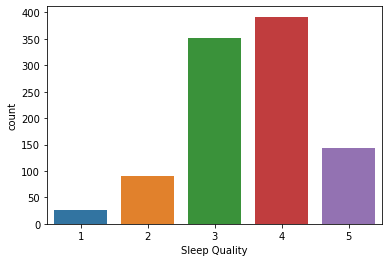

In [15]:
sns.countplot(x="Q10_a", data=sleep)
plt.xlabel('Sleep Quality')

### 2.2.1 Sleep Efficiency

Text(0.5, 0, 'Sleep Efficiency')

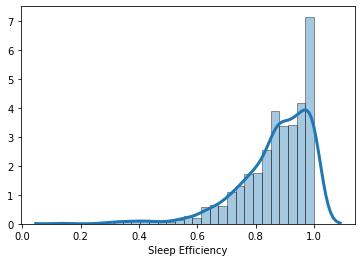

In [16]:
sns.distplot(sleep.sleep_efficiency, 
             hist = True, kde = True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

plt.xlabel('Sleep Efficiency')

## 2.3 Relationship between Variables

### 2.3.1 Sleep Efficiency & Sleep Quality

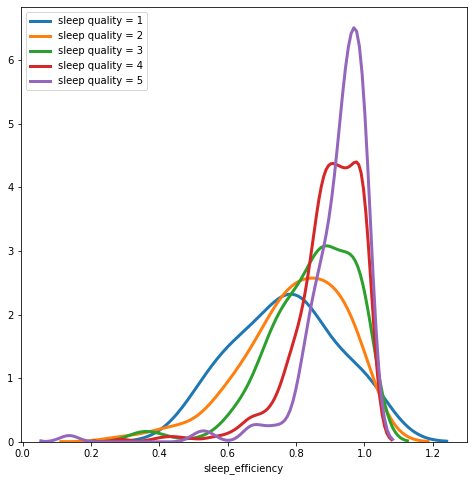

In [17]:
fig = plt.figure(figsize = [8,8])

for i in range(1,6): 
    sns.distplot(sleep.sleep_efficiency.loc[sleep.Q10_a == i], label = 'sleep quality = ' + str(i), hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.legend()

### 2.3.2 Time Go to Bed & Sleep Efficiency

Text(0.5, 0, 'Sleep Efficiency')

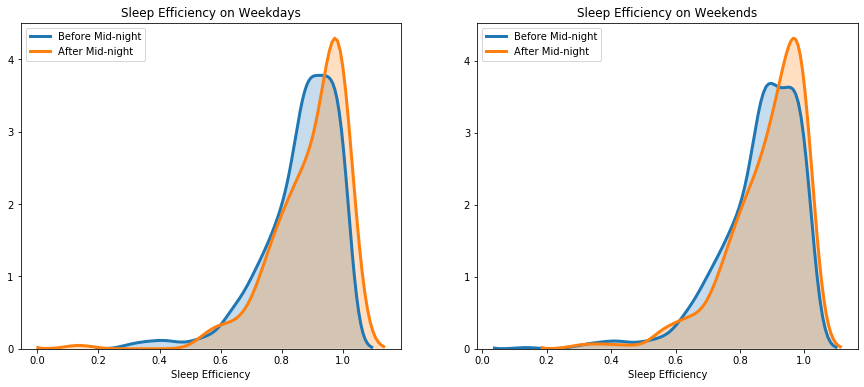

In [18]:
fig = plt.figure(figsize = [15,6])

# Weekdays
ax = fig.add_subplot(121)
sns.distplot(sleep.sleep_efficiency.loc[sleep.before_mnt_week == 'Before Mid-night'], label = 'Before Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)

sns.distplot(sleep.sleep_efficiency.loc[sleep.before_mnt_week == 'After Mid-night'], label = 'After Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)

plt.title('Sleep Efficiency on Weekdays')
plt.legend(loc = 'upper left')
plt.xlabel('Sleep Efficiency')

# Weekends
ax = fig.add_subplot(122)
sns.distplot(sleep.sleep_efficiency.loc[sleep.before_mnt_weekend == 'Before Mid-night'], label = 'Before Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)

sns.distplot(sleep.sleep_efficiency.loc[sleep.before_mnt_weekend == 'After Mid-night'], label = 'After Mid-night', hist = False, kde=True, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, "shade": True},
            ax = ax)
plt.title('Sleep Efficiency on Weekends')
plt.legend(loc = 'upper left')
plt.xlabel('Sleep Efficiency')

### 2.3.3 Time Go to Bed & Sleep Quality

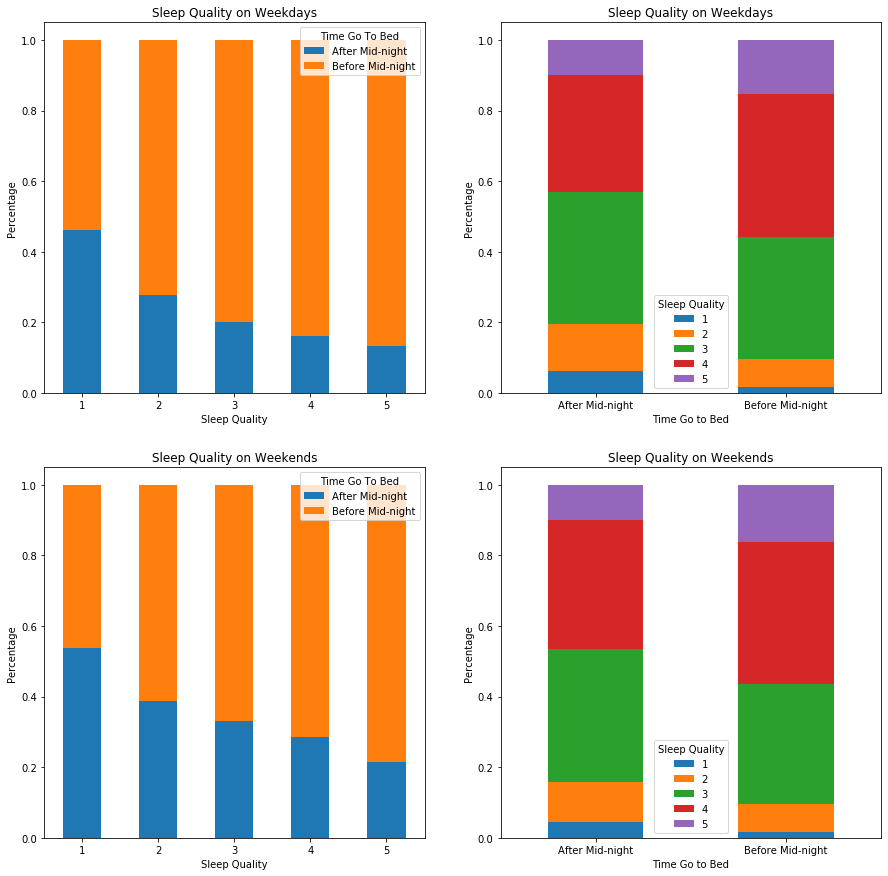

In [19]:
fig = plt.figure(figsize = [15,15])

# Weekdays
ax = fig.add_subplot(221)
bar_data_week = sleep.groupby('Q10_a').before_mnt_week.value_counts(normalize=True).unstack()
bar_data_week.plot(rot=0, kind = 'bar',title = 'Sleep Quality on Weekdays', stacked = True, ax = ax)
plt.legend(title = 'Time Go To Bed')
plt.xlabel('Sleep Quality')
plt.ylabel('Percentage')

# Weekends
ax = fig.add_subplot(223)
bar_data_weekend = sleep.groupby('Q10_a').before_mnt_weekend.value_counts(normalize=True).unstack()
bar_data_weekend.plot(rot=0, kind = 'bar',title = 'Sleep Quality on Weekends', stacked = True, ax = ax)
plt.legend(title = 'Time Go To Bed')
plt.xlabel('Sleep Quality')
plt.ylabel('Percentage')

# Weekdays
ax = fig.add_subplot(222)
bar_data_week2 = sleep.groupby('before_mnt_week').Q10_a.value_counts(normalize=True).unstack()
bar_data_week2.plot(rot=0, kind = 'bar', title = 'Sleep Quality on Weekdays', stacked = True, ax = ax)
plt.legend(title = 'Sleep Quality')
plt.xlabel('Time Go to Bed')
plt.ylabel('Percentage')


# Weekends
ax = fig.add_subplot(224)
bar_data_weekend2 = sleep.groupby('before_mnt_weekend').Q10_a.value_counts(normalize=True).unstack()

bar_data_weekend2.plot(rot=0, kind = 'bar',title = 'Sleep Quality on Weekends', stacked = True, ax = ax)
plt.legend(title = 'Sleep Quality')
plt.xlabel('Time Go to Bed')
plt.ylabel('Percentage')

plt.show()

### 2.3.4 Environmental Factors & Sleep Quality

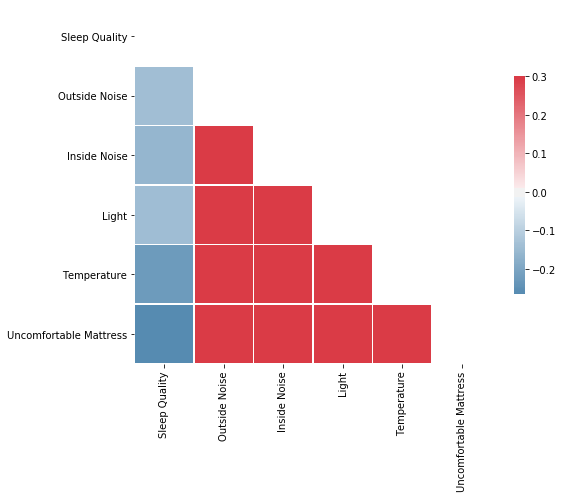

In [20]:
corr_data = sleep.loc[:, ['Q10_a', 'Q15_a', 'Q15_b', 'Q15_c', 'Q15_d', 'Q15_e']]
corr_data.columns = ['Sleep Quality', 'Outside Noise', 'Inside Noise', 'Light','Temperature', 'Uncomfortable Mattress']

corr = corr_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
figure, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(600, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax= .3, center=0,
            square = True, linewidths = .5, cbar_kws={"shrink": .5})

In [21]:
# Number of people with sleeping efficiency < 0.8
sleep.loc[sleep.sleep_efficiency < 0.8].shape

(232, 196)

## Studying the relationship between sleep efficiency and fatigue level

Text(0, 0.5, 'Sleep Efficiency')

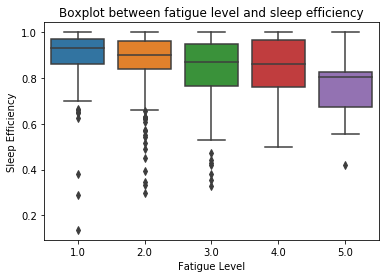

In [22]:
sleep_eff = sleep.loc[sleep.sleep_efficiency <= 1]
s_a=sleep_eff['sleep_efficiency']
sleep['s_a']=s_a
a2=sleep.loc[sleep.Q13_a != -1]['Q13_a']
sleep['a2']=a2
sns.boxplot(x = 'a2', y = 's_a',data=sleep)
plt.title('Boxplot between fatigue level and sleep efficiency')
plt.xlabel('Fatigue Level')
plt.ylabel('Sleep Efficiency')

In [24]:
sleep_fatigue = sleep[(sleep.Q13_a == 1) | (sleep.Q13_a == 2)].Q13_a
Q1 = sleep_fatigue.quantile(0.25)
Q3 = sleep_fatigue.quantile(0.75)
IQR = Q3 - Q1
IQR
fatigue_filter = (sleep.Q13_a <= Q1 - 1.5 * IQR) | (sleep.Q13_a >= Q3 + 1.5 * IQR)
abnormal = sleep[fatigue_filter]
len(abnormal)
abnormal.head()


65

## Sleeping debt

In [25]:
sleep['Total Avg Sleep'] = sleep['Q6_WEEKDAYS']*0.71 + sleep['Q6_WEEKENDS']*0.29
sleep['sleep_Debt'] = (sleep['Q7_TOTAL'] - sleep['Total Avg Sleep']) * 60
sleep['sleep_Debt'].mean() 
sleep_debt = sleep[['sleep_Debt']].groupby(sleep.Q17).mean()
print(sleep_debt)

     sleep_Debt
Q17            
-1    14.775000
 1    10.227778
 2    14.672861
 3    21.509615
 4    18.480000
 5   -14.584615


## Regression for Sleep Quality and Sleep Duration

In [4]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)



import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as P

